In [1]:
import nltk

In [12]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [14]:
from nltk.corpus import treebank

In [16]:
treebank.fileids()

['wsj_0001.mrg',
 'wsj_0002.mrg',
 'wsj_0003.mrg',
 'wsj_0004.mrg',
 'wsj_0005.mrg',
 'wsj_0006.mrg',
 'wsj_0007.mrg',
 'wsj_0008.mrg',
 'wsj_0009.mrg',
 'wsj_0010.mrg',
 'wsj_0011.mrg',
 'wsj_0012.mrg',
 'wsj_0013.mrg',
 'wsj_0014.mrg',
 'wsj_0015.mrg',
 'wsj_0016.mrg',
 'wsj_0017.mrg',
 'wsj_0018.mrg',
 'wsj_0019.mrg',
 'wsj_0020.mrg',
 'wsj_0021.mrg',
 'wsj_0022.mrg',
 'wsj_0023.mrg',
 'wsj_0024.mrg',
 'wsj_0025.mrg',
 'wsj_0026.mrg',
 'wsj_0027.mrg',
 'wsj_0028.mrg',
 'wsj_0029.mrg',
 'wsj_0030.mrg',
 'wsj_0031.mrg',
 'wsj_0032.mrg',
 'wsj_0033.mrg',
 'wsj_0034.mrg',
 'wsj_0035.mrg',
 'wsj_0036.mrg',
 'wsj_0037.mrg',
 'wsj_0038.mrg',
 'wsj_0039.mrg',
 'wsj_0040.mrg',
 'wsj_0041.mrg',
 'wsj_0042.mrg',
 'wsj_0043.mrg',
 'wsj_0044.mrg',
 'wsj_0045.mrg',
 'wsj_0046.mrg',
 'wsj_0047.mrg',
 'wsj_0048.mrg',
 'wsj_0049.mrg',
 'wsj_0050.mrg',
 'wsj_0051.mrg',
 'wsj_0052.mrg',
 'wsj_0053.mrg',
 'wsj_0054.mrg',
 'wsj_0055.mrg',
 'wsj_0056.mrg',
 'wsj_0057.mrg',
 'wsj_0058.mrg',
 'wsj_0059.mrg

In [21]:
wsj_0001 = treebank.sents('wsj_0001.mrg')

In [22]:
for line in wsj_0001:
    print(' '.join(line))

Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 .
Mr. Vinken is chairman of Elsevier N.V. , the Dutch publishing group .


In [25]:
from nltk.tokenize import sent_tokenize

In [26]:
emma = nltk.corpus.gutenberg.raw("austen-emma.txt")

In [27]:
print(sent_tokenize(emma[:1000]))

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.', "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period.", 'Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.', "Sixteen years had Miss Taylor been in Mr. Woodhouse's family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.", 'Between _them_ it was more the intimacy\nof sisters.', 'Even before Miss Taylor had ceased to hold the nominal\noff

In [28]:
from nltk.tokenize import word_tokenize

In [29]:
print(word_tokenize(emma[:100]))

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a']


In [33]:
from nltk.tokenize import RegexpTokenizer
ret = RegexpTokenizer("[\w]+")
ret.tokenize(emma[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

In [34]:
from nltk.stem.snowball import SnowballStemmer

In [35]:
sbst = SnowballStemmer('spanish')

In [36]:
words = ['enviar', 'cocina', 'moscas', 'vidas', 'morir']

In [37]:
[sbst.stem(word) for word in words]

['envi', 'cocin', 'mosc', 'vid', 'mor']

In [38]:
words2 = ['cooking', 'believes']

In [39]:
from nltk.stem.wordnet import WordNetLemmatizer

In [40]:
wl = WordNetLemmatizer()

In [41]:
[wl.lemmatize(word) for word in words2]

['cooking', 'belief']

In [43]:
[wl.lemmatize(word, pos='v') for word in words2]

['cook', 'believe']

In [49]:
from nltk.tag import pos_tag
from nltk import Text
emma_tag = pos_tag(ret.tokenize(emma))

In [52]:
ret = RegexpTokenizer("[\w]{2,}")

In [53]:
emma_tag = pos_tag(ret.tokenize(emma))

In [54]:
emma_nouns=[t[0] for t in emma_tag if t[1]=='NN']
emma_text = Text(emma_nouns, name="Emma")

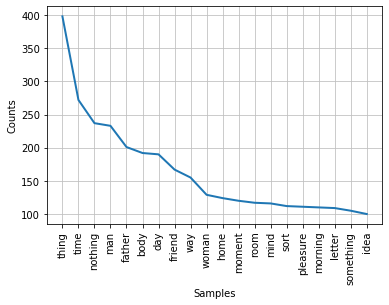

In [55]:
emma_text.plot(20)

# 연설문 텍스트마이닝

In [151]:

import pandas as pd
'''
#speech_txt = pd.read_csv("./speech/Obama Speech.txt", sep='#', header=None)
speech_txt = pd.read_csv("./speech/Clinton Speech - Farewell Address.txt", sep='#', header=None)
'''
import os

speech_txt_list = list()
speech_txt_title = list()
for root, dirs, files in os.walk('./speech'):
    for fname in files:
        speech_txt_list.append(pd.read_csv(os.path.join(root, fname), sep='#', header=None))
        #print(os.path.join(root, fname))
        
        speech_txt_title.append(fname)
        
file_len = len(speech_txt_list)

In [158]:
from nltk.tokenize import RegexpTokenizer
from nltk.tag import pos_tag

def get_nouns_list(line):
    line = str(line)
    ret = RegexpTokenizer("[\w]{2,}")
    tokens = ret.tokenize(line)
    tagged_list = pos_tag(tokens)
    
    #stopwords = ['nation', 'day'] # 불용어 리스트
    nouns_list = [t[0] for t in tagged_list if t[1]=='NN']
             #and t[0] not in stopwords]
    return nouns_list

In [200]:
from itertools import chain
from nltk import Text

#speech_df_list = list()
result_list = list()
#speech_pos_list = list()
text_list = list()

speech_list = list()
speech_common_list = list()

for i in range(file_len):
    speech_df = speech_txt_list[i].applymap(get_nouns_list)
    #speech_df_list.append(speech_txt_list[i].applymap(get_nouns_list))
    result = list()
    for j in range(speech_df_list[i].shape[0]):
        # print(speech_df.iloc[i])
        result.extend(speech_df_list[i].iloc[j])
        
    result_list.append(result)
    
    speech_pos = list(chain.from_iterable(result_list[i]))
#    speech_pos_list.append(speech_pos)
    #speech_pos_result.append(list(chain.from_iterable(result_list[i])))
    
    #text_list.append(Text(speech_pos, name="speech"))
    text = Text(speech_pos, name="speech")
    text_list.append(text)z
    #text.plot(10)
    speech_list.append(text.vocab())
    speech_common_list.append(speech_list[i].most_common(10))
    
    
    '''
    print(i, speech_txt_title[i])
    print("---------------------------")
    print(speech_list[i].most_common(10))
    print()
    '''
    #max_word = speech_list[i].most_common(1)
    #print(text.concordance(max_word[0][0]))
    
speech_common = pd.DataFrame(data=
                             {"file name":speech_txt_title, 
                              "common word":speech_common_list})


<Text: speech>
<Text: speech>
<Text: speech>
<Text: speech>
<Text: speech>
<Text: speech>
<Text: speech>
<Text: speech>
<Text: speech>
<Text: speech>
<Text: speech>
<Text: speech>
<Text: speech>
<Text: speech>


In [182]:
speech_common.to_csv("speech.csv", sep=',')

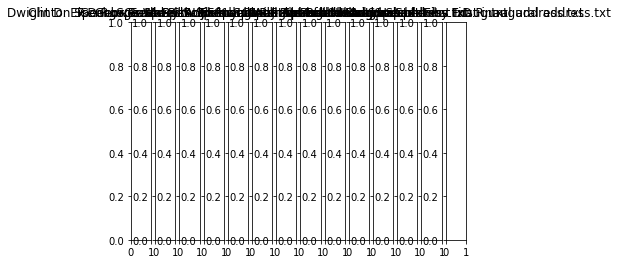

In [199]:
import matplotlib
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,file_len)
cnt = 0
for text in text_list:
    axes[cnt].set(title=speech_txt_title[cnt])
    cnt+=1

In [103]:
text.concordance('nation') # 단어가 쓰인 모든 경우의 문맥을 찾아줌

Displaying 1 of 1 matches:
tonight opportunity note honor Nation century time transformation challen


In [188]:
result_list

[[['tonight', 'opportunity', 'note', 'honor', 'Nation', 'century'],
  [],
  ['time',
   'transformation',
   'challenge',
   'fabric',
   'passage',
   'information',
   'age',
   'era',
   'renewal'],
  ['work',
   'decision',
   'executive',
   'action',
   'bill',
   'future',
   'society',
   'economy',
   'cleaner',
   'environment',
   'freer',
   'safer',
   'world'],
  ['course',
   'opportunity',
   'responsibility',
   'community',
   'kind',
   'time',
   'future'],
  ['economy',
   'unemployment',
   'homeownership',
   'expansion',
   'history',
   'family',
   'law',
   'welfare',
   'year',
   'low',
   'college',
   'aid',
   'college',
   'accountability',
   'test',
   'graduation',
   'health',
   'insurance',
   'poverty',
   'board',
   'air',
   'water',
   'food',
   'drinking',
   'water',
   'land',
   'time'],
  ['peace',
   'prosperity',
   'corner',
   'globe',
   'leadership',
   'position',
   'future'],
  ['future'],
  ['record', 'responsibility'],
  ['re